In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [50]:
# Human population in the region, Nh.
Nh = 1000
#Sh: human population from R region susceptible to coronavirus;
Sh=500
#Nv: circulating population of R with no coronavirus immunity;
Nv=300
#Sh barra
Sh_barra=Nh*Sh
#Ih : population from Rof people infected with coronavirus
Ih=400
#Ig indicates the infected human population in total isolation
Ig=200
#Rh: population from R of people recovered from a coronavirus infection;
Rh=250
#Sv=Nv∪Ih: people with the potential for diffusion of coronavirus;
Sv=Nv+Ih
#Iv=Nv-Ig: people contaminated by coronavirus who promote the spread of spots;
Iv=Nv-Ig
#Ih barra
Ih_barra = Ih*Ih
#Sv barra
Sv_barra = Sv*Nv
#Iv barra
Iv_barra = Iv*Iv

#Another values
muh,nh,betah,b,m,gammah,A,muv = 0.01,0.2,0.03,0.5,0.02,0.03,11.0,0.01 

# A grid of time points (in days)
t = np.linspace(0, 20, 20)


In [51]:
def sist(y,t,muh,nh,betah,b,m,gammah,A,muv):
    Sh_barra,Ih_barra,Rh_barra,Sv_barra,Iv_barra = y
    dSh_barradt = muh*(nh-Sh_barra) - ((betah*b*Sh_barra)/(Nh+m))*(Iv_barra)
    dIh_barradt = ((betah*b*Sh)/(Nh+m))*Iv - (muh+gammah)*Ih
    dRh_barradt = gammah*Ih - muh*Rh
    dSv_barradt = A - ((betah*b*Sh)/(Nh+m))*Ih - muv*Sv
    dIv_barradt = ((betah*b*Sh)/(Nh+m))*Ih - muv*Iv
    return dSh_barradt,dIh_barradt,dRh_barradt,dSv_barradt,dIv_barradt

In [52]:
#Constantes
Sh_barra0=0
Ih_barra0=0
Rh_barra0=0
Sv_barra0=100
Iv_barra0=0

# Initial conditions vector
y0 = Sh_barra0, Iv_barra0, Rh_barra0, Sv_barra0, Iv_barra0 #(System of 5 equations)


#Integrate the sistem with 8 differential equations
ret = odeint(sist, y0, t, args=(muh,nh,betah,b,m,gammah,A,muv))
Sh_barra, Ih_barra, Rh_barra,Sv_barra,Iv_barra = ret.T


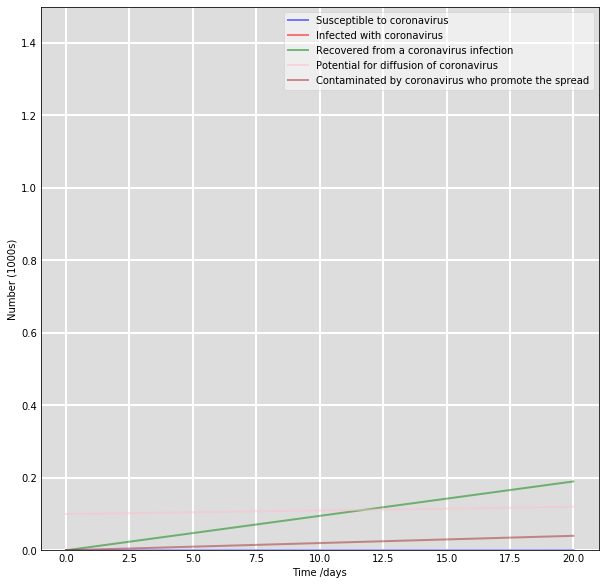

In [53]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
fig.set_size_inches(10,10)

ax = fig.add_subplot(111, facecolor='#ddddde', axisbelow=True)

ax.plot(t, Sh_barra/1000, 'b', alpha=0.5, lw=2, label='Susceptible to coronavirus')

ax.plot(t, Ih_barra/1000, 'r', alpha=0.5, lw=2, label='Infected with coronavirus')

ax.plot(t, Rh_barra/1000, 'g', alpha=0.5, lw=2, label='Recovered from a coronavirus infection')

ax.plot(t, Sv_barra/1000, 'pink', alpha=0.5, lw=2, label='Potential for diffusion of coronavirus')

ax.plot(t, Iv_barra/1000, 'brown', alpha=0.5, lw=2, label='Contaminated by coronavirus who promote the spread')

ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.5)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)

ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)

for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(True)
plt.show()